In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime

### Importing the Dataset

In [2]:
df = pd.read_excel("Evans SuperStore Sales.xlsx")

### Exploring the Dataset

In [3]:
df.head()

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Female,44,2022-12-04,Delivered,Mobile App,JNE1233-BLUE-KR-031-XXL,Pant,XXL,1,NGN,376,Abuja,140301,Nigeria,False
1,2,405-2183842-2225946,2183842,Female,29,2022-12-04,Delivered,Field Sales,Casual414-KR-NP-L,Casual,L,1,NGN,1449,Kano,122002,Nigeria,False
2,3,171-1641533-8921966,1641533,Female,67,2022-12-04,Delivered,Mobile App,Casual261-KR-PP-S,Casual,S,1,NGN,453,Abuja,700029,Nigeria,False
3,4,404-7490807-6300351,7490807,Female,20,2022-12-04,Delivered,Jiji,Casual110-KR-PP-M,Casual,M,1,NGN,729,Enugu,613007,Nigeria,False
4,5,403-9293516-4577154,9293516,Female,62,2022-12-04,Delivered,Mobile App,JNE2294-KR-A-XXL,Pant,XXL,1,NGN,544,Kano,122001,Nigeria,False


In [4]:
df.describe()

,index,Cust ID,Age,Qty,Amount,ship-postal-code
count,31047.00000,3.104700e+04,31047.000000,31047.000000,31047.000000,31047.000000
mean,15524.00000,4.936824e+06,39.496570,1.006120,682.074822,460474.587206
std,8962.64124,2.900678e+06,15.117233,0.094088,268.582173,198116.733009
min,1.00000,8.950000e+02,18.000000,1.000000,229.000000,110001.000000
25%,7762.50000,2.416471e+06,28.000000,1.000000,486.000000,313001.000000
50%,15524.00000,4.909885e+06,37.000000,1.000000,646.000000,500028.000000
75%,23285.50000,7.454182e+06,47.000000,1.000000,794.000000,600040.000000
max,31047.00000,9.999233e+06,78.000000,5.000000,3036.000000,855117.000000


In [5]:
df.dtypes

index                        int64
Order ID                    object
Cust ID                      int64
Gender                      object
Age                          int64
Date                datetime64[ns]
Status                      object
Channel                     object
SKU                         object
Category                    object
Size                        object
Qty                          int64
currency                    object
Amount                       int64
ship-state                  object
ship-postal-code             int64
ship-country                object
B2B                           bool
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31047 entries, 0 to 31046
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             31047 non-null  int64         
 1   Order ID          31047 non-null  object        
 2   Cust ID           31047 non-null  int64         
 3   Gender            31047 non-null  object        
 4   Age               31047 non-null  int64         
 5   Date              31047 non-null  datetime64[ns]
 6   Status            31047 non-null  object        
 7   Channel           31047 non-null  object        
 8   SKU               31047 non-null  object        
 9   Category          31047 non-null  object        
 10  Size              31047 non-null  object        
 11  Qty               31047 non-null  int64         
 12  currency          31047 non-null  object        
 13  Amount            31047 non-null  int64         
 14  ship-state        3104

#### Checking for null values

In [7]:
df.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Date                0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

#### There are no null values in the dataset

##### Renaming Columns

In [8]:
df.rename(columns={"Channel ": "Channel"}, inplace=True)

In [9]:
df.shape

(31047, 18)

#### Adding a revenue column

In [10]:
df["Revenue"] = (df["Qty"]*(df["Amount"]))
df.head(3)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,Size,Qty,currency,Amount,ship-state,ship-postal-code,ship-country,B2B,Revenue
0,1,171-1029312-3038738,1029312,Female,44,2022-12-04,Delivered,Mobile App,JNE1233-BLUE-KR-031-XXL,Pant,XXL,1,NGN,376,Abuja,140301,Nigeria,False,376
1,2,405-2183842-2225946,2183842,Female,29,2022-12-04,Delivered,Field Sales,Casual414-KR-NP-L,Casual,L,1,NGN,1449,Kano,122002,Nigeria,False,1449
2,3,171-1641533-8921966,1641533,Female,67,2022-12-04,Delivered,Mobile App,Casual261-KR-PP-S,Casual,S,1,NGN,453,Abuja,700029,Nigeria,False,453


#### Splitting the date column into Day, Weekday and Month

In [11]:
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day
df["Weekday_num"] = df["Date"].dt.weekday
df["Month_num"] = df["Date"].dt.month
df = df.sort_values("Date",ascending=True)
df.head(3)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,ship-state,ship-postal-code,ship-country,B2B,Revenue,Weekday,Month,Day,Weekday_num,Month_num
10603,10604,402-0891131-7973166,891131,Male,31,2022-01-04,Returned,Telesales,JNE3797-KR-A-M,Denim,...,Abia,759122,Nigeria,False,771,Tuesday,January,4,1,1
10470,10471,406-1156244-0769963,1156244,Male,76,2022-01-04,Delivered,Walk-in,J0041-Casual-L,Casual,...,Enugu,638183,Nigeria,False,660,Tuesday,January,4,1,1
10471,10472,404-6564128-0027511,6564128,Male,23,2022-01-04,Delivered,Telesales,Casual397-KR-NP -M,Casual,...,Anambra,800013,Nigeria,False,999,Tuesday,January,4,1,1


#### Segmenting the Age into groups of Youth, Adult and Old

In [12]:
bins = [18,35,50,78]
labels = ["Youth","Adult","Old"]
df["Age_Group"] = pd.cut(df["Age"],bins = bins, labels = labels)
df.head(3)

,index,Order ID,Cust ID,Gender,Age,Date,Status,Channel,SKU,Category,...,ship-postal-code,ship-country,B2B,Revenue,Weekday,Month,Day,Weekday_num,Month_num,Age_Group
10603,10604,402-0891131-7973166,891131,Male,31,2022-01-04,Returned,Telesales,JNE3797-KR-A-M,Denim,...,759122,Nigeria,False,771,Tuesday,January,4,1,1,Youth
10470,10471,406-1156244-0769963,1156244,Male,76,2022-01-04,Delivered,Walk-in,J0041-Casual-L,Casual,...,638183,Nigeria,False,660,Tuesday,January,4,1,1,Old
10471,10472,404-6564128-0027511,6564128,Male,23,2022-01-04,Delivered,Telesales,Casual397-KR-NP -M,Casual,...,800013,Nigeria,False,999,Tuesday,January,4,1,1,Youth


## Time Series

### Revenue vs Orders MoM

In [13]:
Revenue_month = df.groupby("Month_num")["Revenue"].sum()
Revenue_weekday = df.groupby("Weekday_num")["Revenue"].sum()

In [14]:
Orders_month = df.groupby("Month_num")["Order ID"].count()
Orders_weekday = df.groupby("Weekday_num")["Order ID"].count()

In [15]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [16]:
df.pivot_table(index=["Month_num","Month"],
               values=["Revenue","Order ID"],
               aggfunc={"Revenue":sum,"Order ID":"count"})

,,Order ID,Revenue
Month_num,Month,,
1,January,2702,1839113
2,February,2750,1900550
3,March,2819,1961232
4,April,2685,1854665
5,May,2617,1833460
6,June,2597,1768326
7,July,2579,1794794
8,August,2617,1826937
9,September,2490,1715429


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2289808585.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)


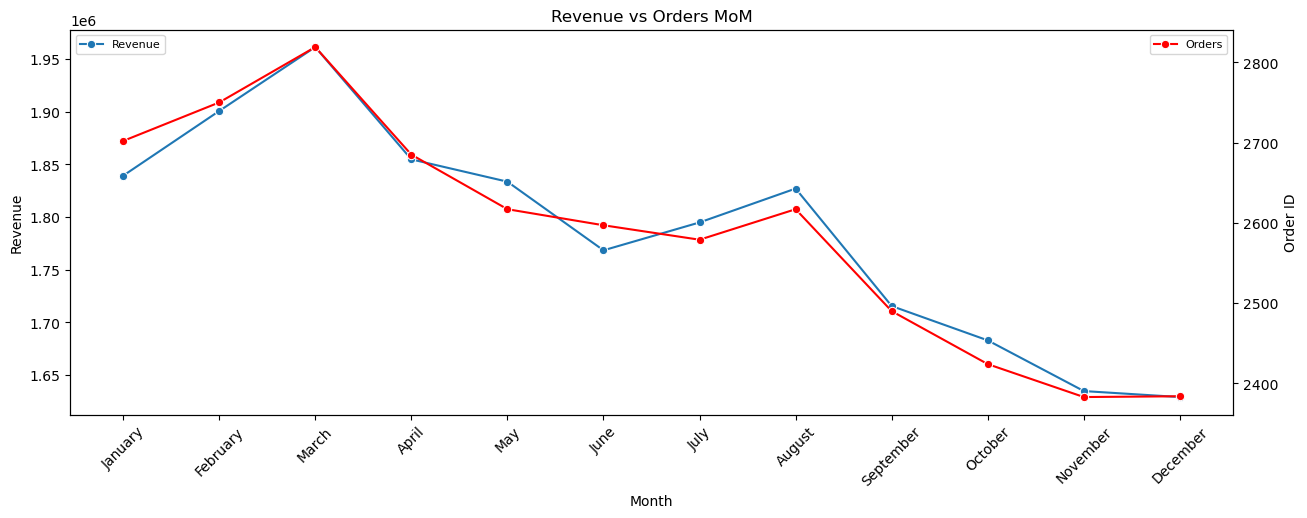

In [17]:
fig, ax1 = plt.subplots(figsize=(15, 5))
sns.lineplot(Revenue_month,marker="o", ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(Orders_month, marker="o", ax=ax2, color="r")
ax1.set_xticklabels(month_order, rotation=45)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xlabel("Month")
ax1.legend(["Revenue"], loc="upper left", fontsize=8)
ax2.legend(["Orders"], loc="upper right", fontsize=8)
plt.title("Revenue vs Orders MoM")
plt.show()

##### The top performing month in terms of both revenue generation and orders received is March. However, in the last quarter of the year, both revenue and orders experienced a downward trend, reaching their lowest point in December.

###  Revenue vs Orders by Day of the Week

In [18]:
df.pivot_table(index=["Weekday_num","Weekday"],
               values=["Revenue","Order ID"],
               aggfunc={"Revenue":sum,"Order ID":"count"})

,,Order ID,Revenue
Weekday_num,Weekday,,
0,Monday,4019,2755130
1,Tuesday,5532,3809368
2,Wednesday,4339,2988072
3,Thursday,3201,2228882
4,Friday,4519,3143320
5,Saturday,4713,3236298
6,Sunday,4724,3280139


C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2319018958.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(day_order, rotation=45)


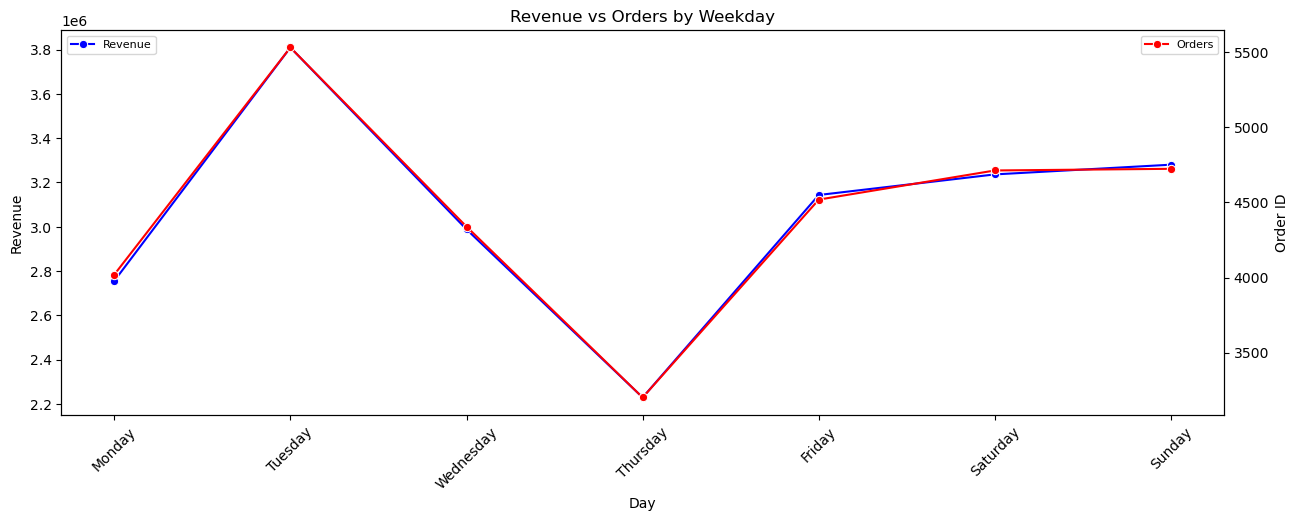

In [19]:
fig,ax1=plt.subplots(figsize=(15,5))
sns.lineplot(Revenue_weekday, color = "b", marker="o", ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(Orders_weekday, color="r", marker="o", ax=ax2)
ax1.set_xticklabels(day_order, rotation=45)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xlabel("Day")
ax1.legend(["Revenue"], loc="upper left", fontsize=8)
ax2.legend(["Orders"], loc="upper right", fontsize=8)
plt.title("Revenue vs Orders by Weekday")
plt.show()


##### The busiest day of the week is Tuesday, with peak revenue and orders. From Tuesday, both revenue and orders gradually decrease until Thursday, which is the least performing day. However, starting from Friday, both revenue and orders show an upward trend and continue to grow.

### Refunds by Month and Weekday

In [20]:
Refund_monthly_revenue = df.loc[df["Status"]=="Refunded","Revenue"].groupby(df["Month_num"]).sum() 
Refund_weekday_revenue = df.loc[df["Status"]=="Refunded","Revenue"].groupby(df["Weekday_num"]).sum()

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\1024542146.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\1024542146.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)


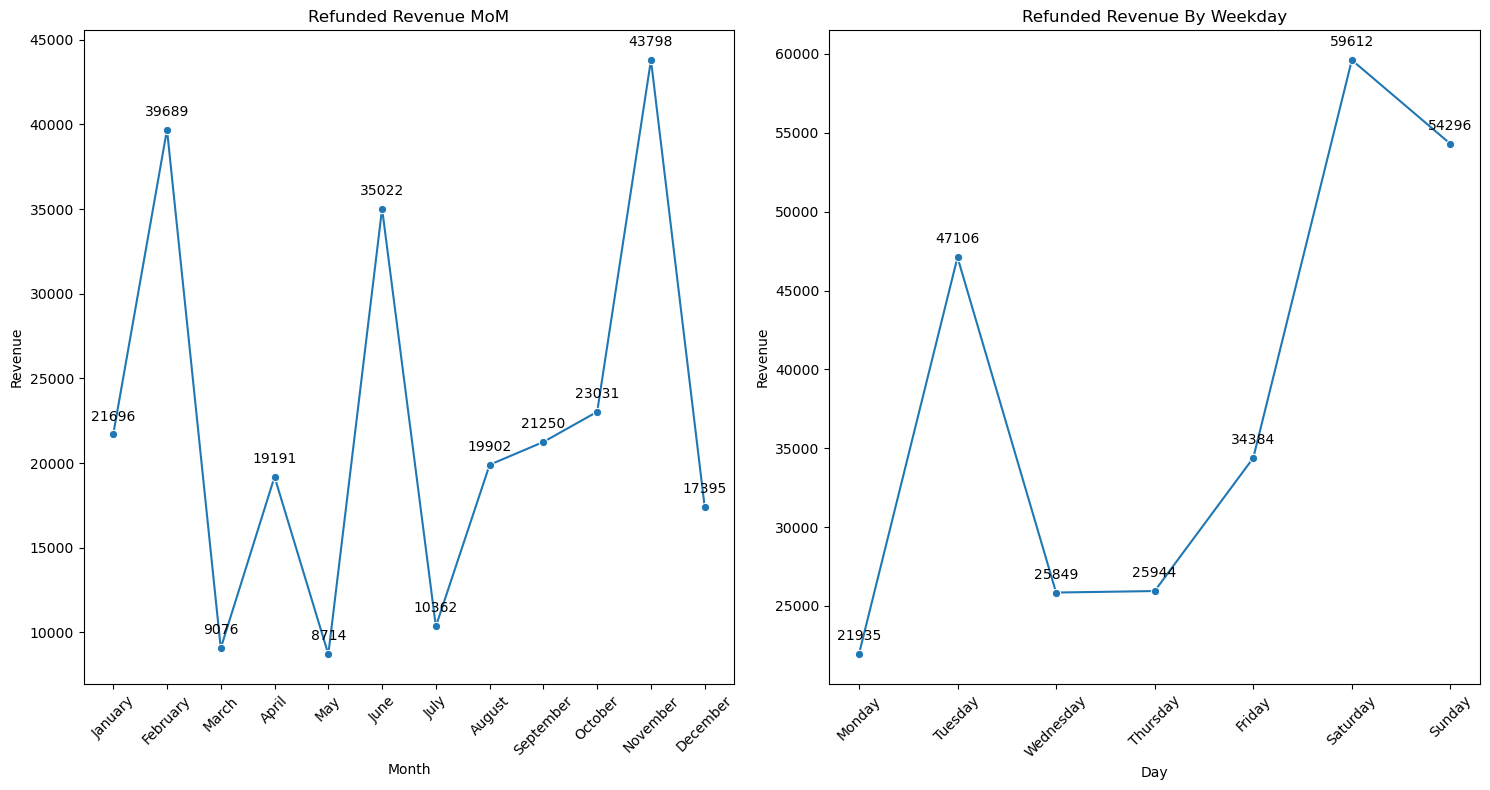

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,8))

sns.lineplot(Refund_monthly_revenue,marker="o",ax=ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xticklabels(month_order, rotation=45)
ax1.set_title("Refunded Revenue MoM")
ax1.set_xlabel("Month")

sns.lineplot(Refund_weekday_revenue,marker="o",ax=ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_xlabel("Day")
ax2.set_title("Refunded Revenue By Weekday")

for ax in (ax1,ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()


##### The revenue refunded was highest on Saturdays and in the month of November, while it was lowest on Mondays and in month of May 

### Monthly and Weekday Return and Cancel rate

In [22]:
Returns_month = round(df.loc[df["Status"]=="Returned"].groupby("Month_num").size()/df.groupby("Month_num").size()*100,2)
Returns_weekday = round(df.loc[df["Status"]=="Returned"].groupby("Weekday_num").size()/df.groupby("Weekday_num").size()*100,2)
Cancel_month = round(df.loc[df["Status"]=="Cancelled"].groupby("Month_num").size()/df.groupby("Month_num").size()*100,2)
Cancel_weekday = round(df.loc[df["Status"]=="Cancelled"].groupby("Weekday_num").size()/df.groupby("Weekday_num").size()*100,2)

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4220880944.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4220880944.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4220880944.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4220880944.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(day_order, rotation=45)


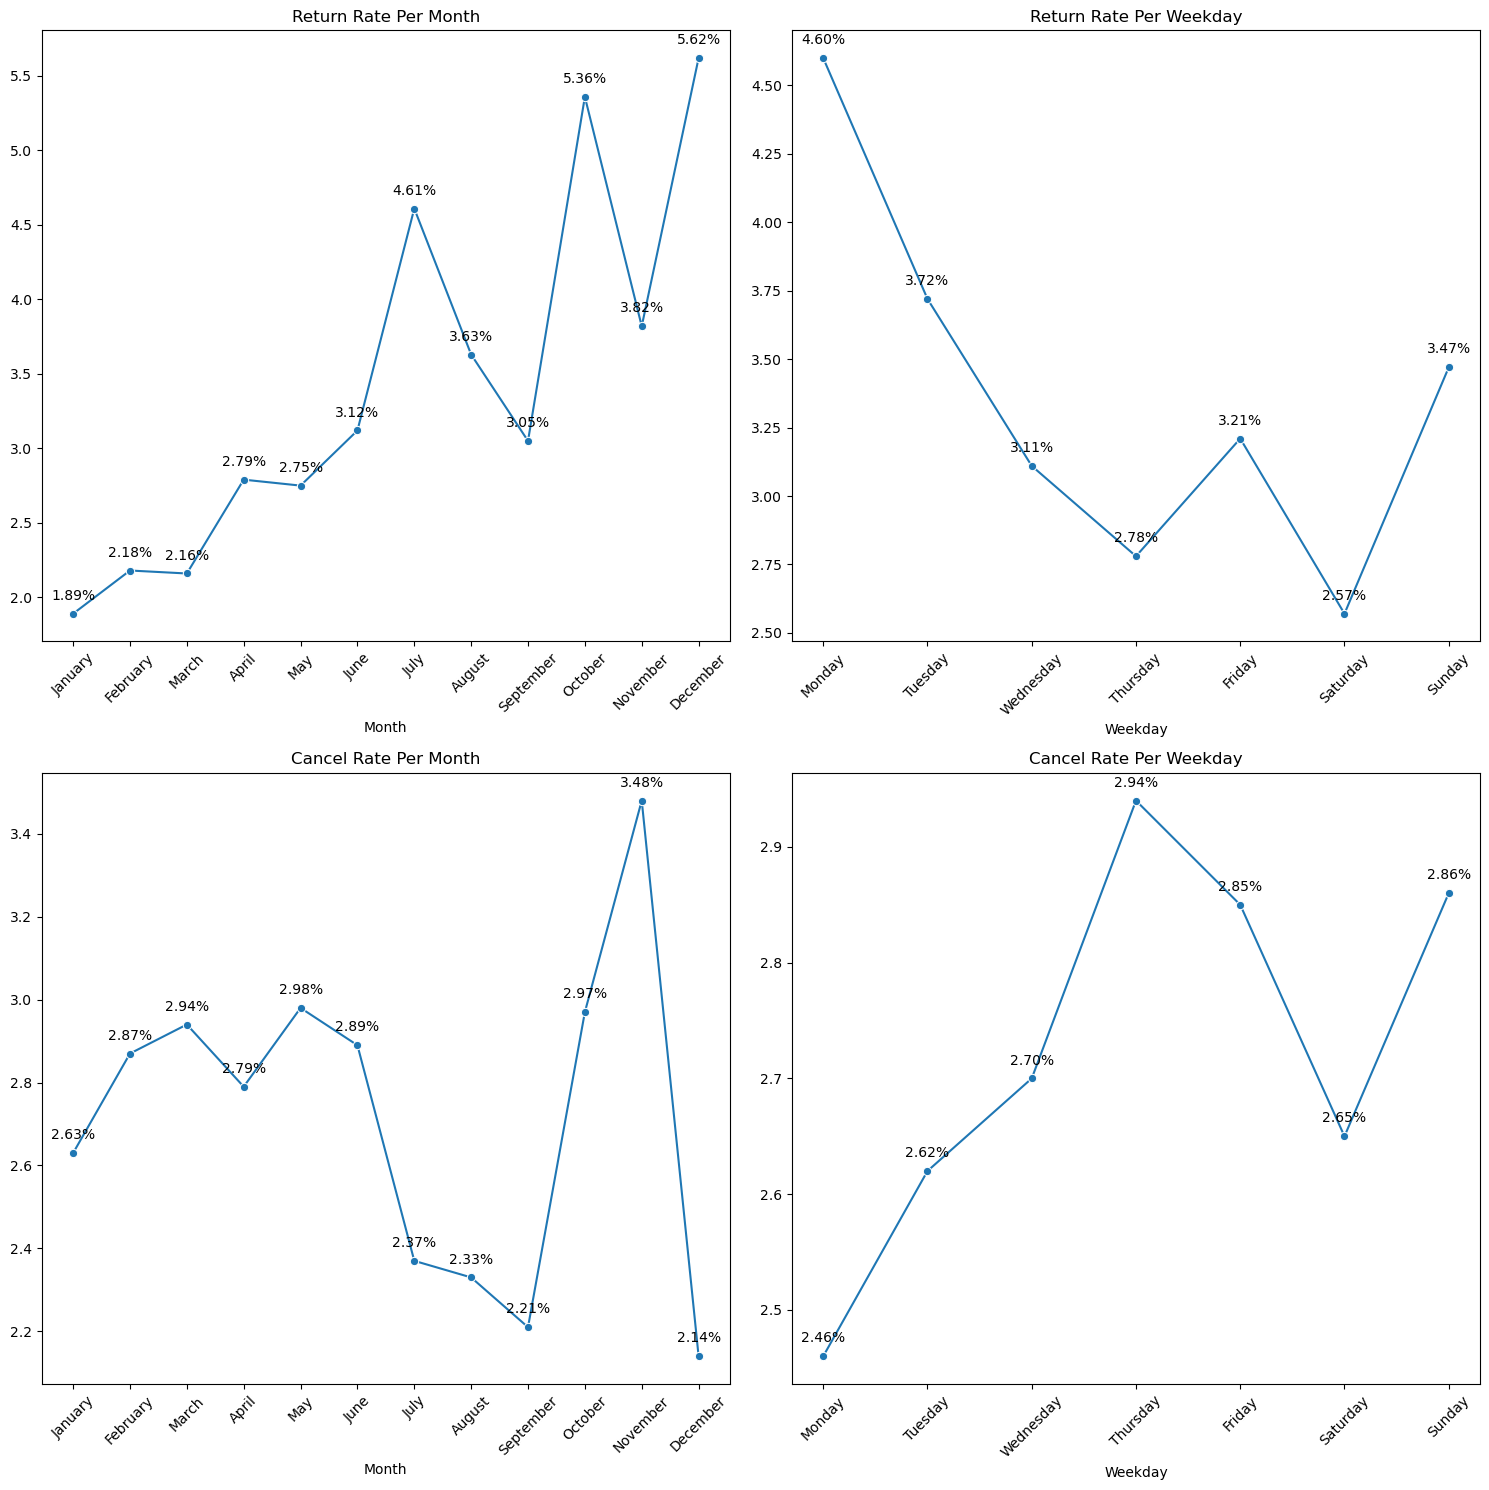

In [23]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows=2,figsize=(15,15))

sns.lineplot(x=Returns_month.index,y=Returns_month.values,marker = "o",ax=ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xticklabels(month_order, rotation=45)
ax1.set_title("Return Rate Per Month")
ax1.set_xlabel("Month")

sns.lineplot(x=Returns_weekday.index, y=Returns_weekday.values,marker = "o",ax=ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_title("Return Rate Per Weekday")
ax2.set_xlabel("Weekday")

sns.lineplot(x=Cancel_month.index,y=Cancel_month.values,marker = "o",ax=ax3)
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax3.set_xticklabels(month_order, rotation=45)
ax3.set_title("Cancel Rate Per Month")
ax3.set_xlabel("Month")

sns.lineplot(x=Cancel_weekday.index,y=Cancel_weekday.values,marker = "o", ax=ax4)
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax4.set_xticklabels(day_order, rotation=45)
ax4.set_title("Cancel Rate Per Weekday")
ax4.set_xlabel("Weekday")

for ax in (ax1,ax2,ax3,ax4):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}%".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
plt.tight_layout()
plt.show()

##### In December, the return rate reaches its peak with 5.62% of orders being returned, predominantly on Mondays with a return rate of 4.60%. On the other hand, the cancel rate is highest in November, particularly on Thursdays, with a total of 3.48% and 2.94% cancel rates, respectively.

### Delivery Rate by Month and Weekday

In [24]:
Delivered_month = round(df.loc[df["Status"]=="Delivered"].groupby("Month_num").size()/df.groupby("Month_num").size()*100,2)
Delivered_weekday = round(df.loc[df["Status"]=="Delivered"].groupby("Weekday_num").size()/df.groupby("Weekday_num").size()*100,2)

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2394873523.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2394873523.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)


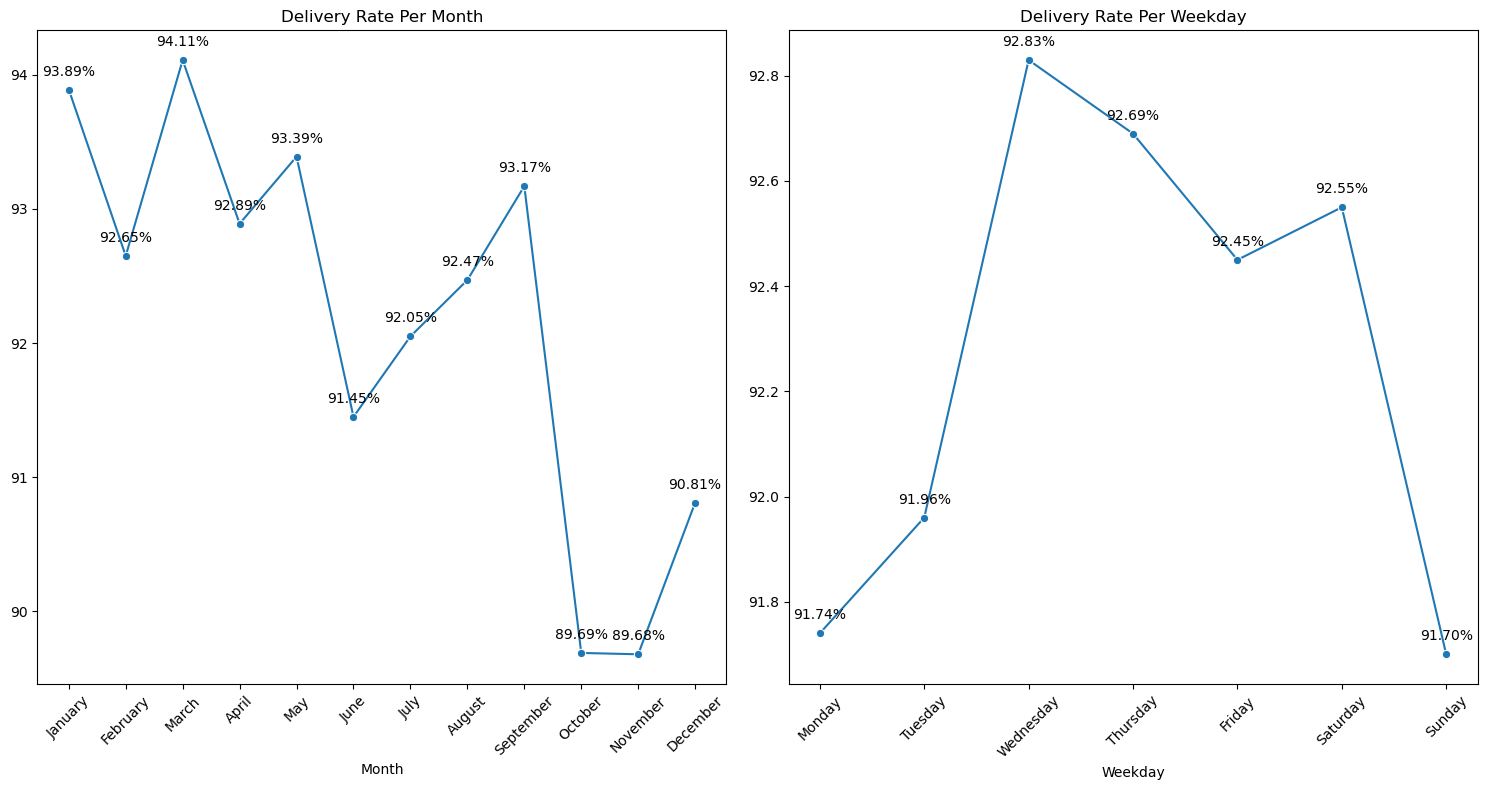

In [25]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,8))

sns.lineplot(x=Delivered_month.index,y=Delivered_month.values,marker = "o",ax=ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xticklabels(month_order, rotation=45)
ax1.set_title("Delivery Rate Per Month")
ax1.set_xlabel("Month")

sns.lineplot(x=Delivered_weekday.index, y=Delivered_weekday.values,marker = "o",ax=ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_title("Delivery Rate Per Weekday")
ax2.set_xlabel("Weekday")
for ax in (ax1,ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}%".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
    
plt.tight_layout()

plt.show()

##### The highest delivery rate was recorded in the month of March, and Wednesday had the highest delivery rate among all the days.

## Category Analysis

In [26]:
Category_revenue = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)
Category_orders = df.groupby("Category")["Order ID"].count().sort_values(ascending=False)
Category_delivered = df.loc[df["Status"] == "Delivered", "Order ID"].groupby(df["Category"]).count().sort_values(ascending=False)
Category_returns = df.loc[df["Status"] == "Returned", "Order ID"].groupby(df["Category"]).count().sort_values(ascending=False)
Category_cancelled = df.loc[df["Status"] == "Cancelled", "Order ID"].groupby(df["Category"]).count().sort_values(ascending=False)
Category_refunds = df.loc[df["Status"] == "Refunded", "Revenue"].groupby(df["Category"]).sum().sort_values(ascending=False)

### Revenue and Orders per Category

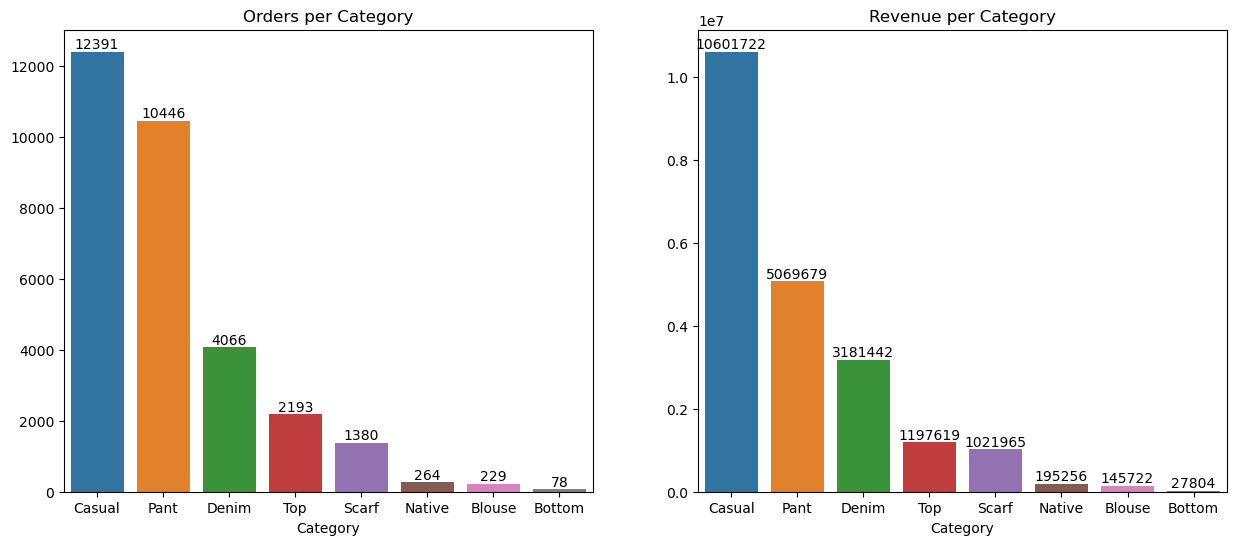

In [27]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(15,6))
sns.barplot(x = Category_orders.index,y = Category_orders.values,ax=ax1)
for p in ax1.patches:
        ax1.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")
ax1.set_title("Orders per Category")
sns.barplot(x = Category_revenue.index,y = Category_revenue.values,ax=ax2)
for p in ax2.patches:
        ax2.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")
ax2.set_title("Revenue per Category")

plt.show()

##### The Casual category stands out as the most preferred choice among customers, commanding both the highest number of orders and the highest revenue. It is undoubtedly the top-performing category

### Delivered, Returned, Refunded and Cancelled Orders per Category

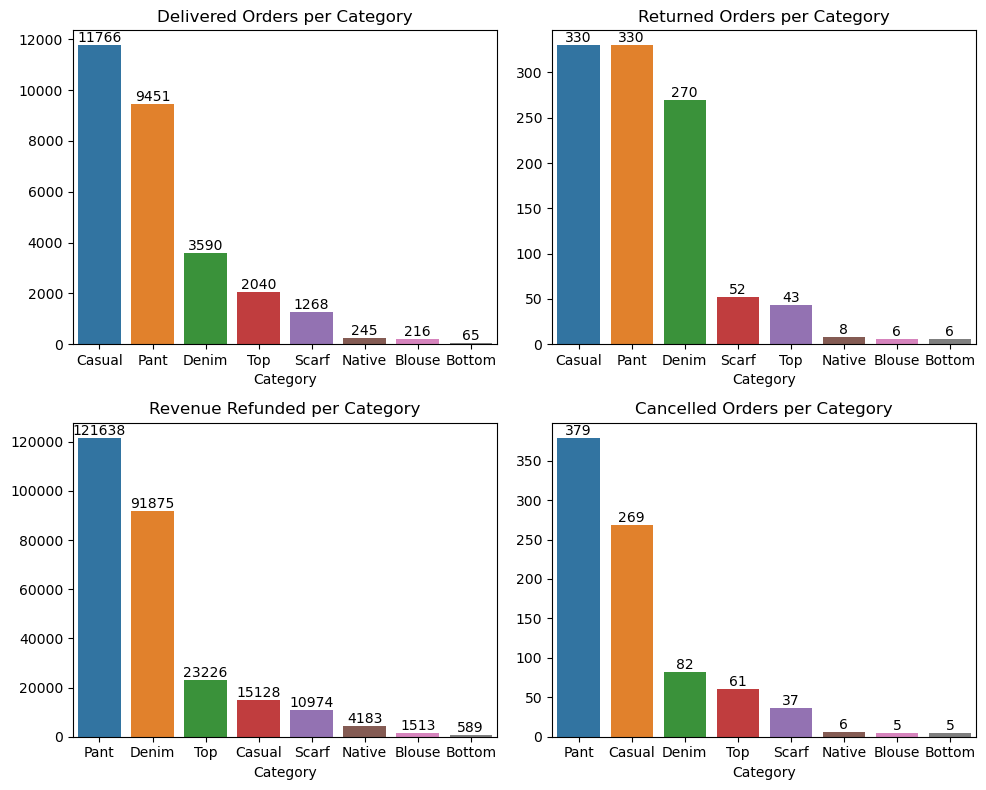

In [28]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
sns.barplot(x = Category_delivered.index,y = Category_delivered.values,ax=ax1)
ax1.set_title("Delivered Orders per Category")

sns.barplot(x = Category_returns.index,y = Category_returns.values,ax=ax2)
ax2.set_title("Returned Orders per Category")

sns.barplot(x = Category_refunds.index,y = Category_refunds.values,ax=ax3)
ax3.set_title("Revenue Refunded per Category")

sns.barplot(x = Category_cancelled.index,y = Category_cancelled.values,ax=ax4)
ax4.set_title("Cancelled Orders per Category")

for ax in (ax1, ax2, ax3,ax4):
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")
plt.tight_layout()
plt.show()


##### The Casual category stands out with the highest number of deliveries and returns, closely followed by the Pant category. Moreover, the Pant category shows the highest amount of revenue refunded and cancelled orders among all the categories.

## Gender Analysis

### Gender Distribution

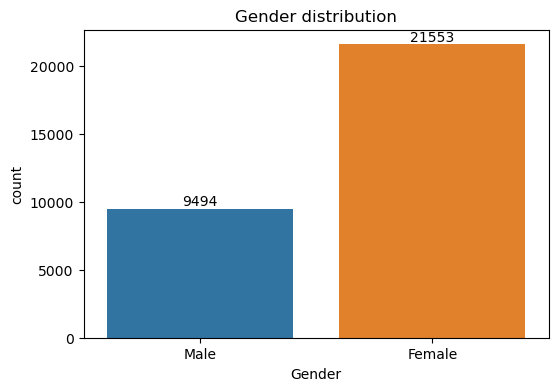

In [29]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x = "Gender", data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Gender distribution")
plt.show()

##### There are more of female customers 

### Revenue per Gender

In [30]:
Revenue_gender = df.groupby("Gender")["Revenue"].sum()

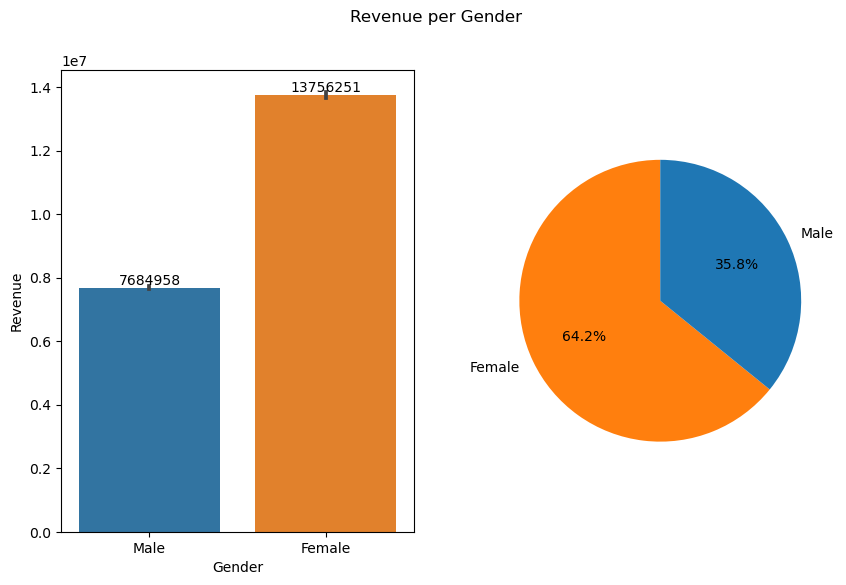

In [31]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(10,6))
sns.barplot(x = "Gender",y = "Revenue",estimator = sum, data = df,ax=ax1,palette=["#1f77b4", "#ff7f0e"])
for p in ax1.patches:
        ax1.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")
ax2.pie(Revenue_gender,labels = Revenue_gender.index,autopct = "%1.1f%%",startangle = 90,colors=["#ff7f0e","#1f77b4"])
plt.suptitle("Revenue per Gender")
plt.show()

##### Based on the data, female customers make more purchases than male customers, resulting in the majority of the revenue being generated from female customers.

### Revenue and Orders per Gender per Month

In [32]:
Revenue_gender_month = df.groupby(["Gender", "Month_num"])["Revenue"].sum().unstack("Gender")
Orders_gender_month = df.groupby(["Gender", "Month_num"])["Order ID"].count().unstack("Gender")

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\1519379447.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\1519379447.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(month_order, rotation=45)


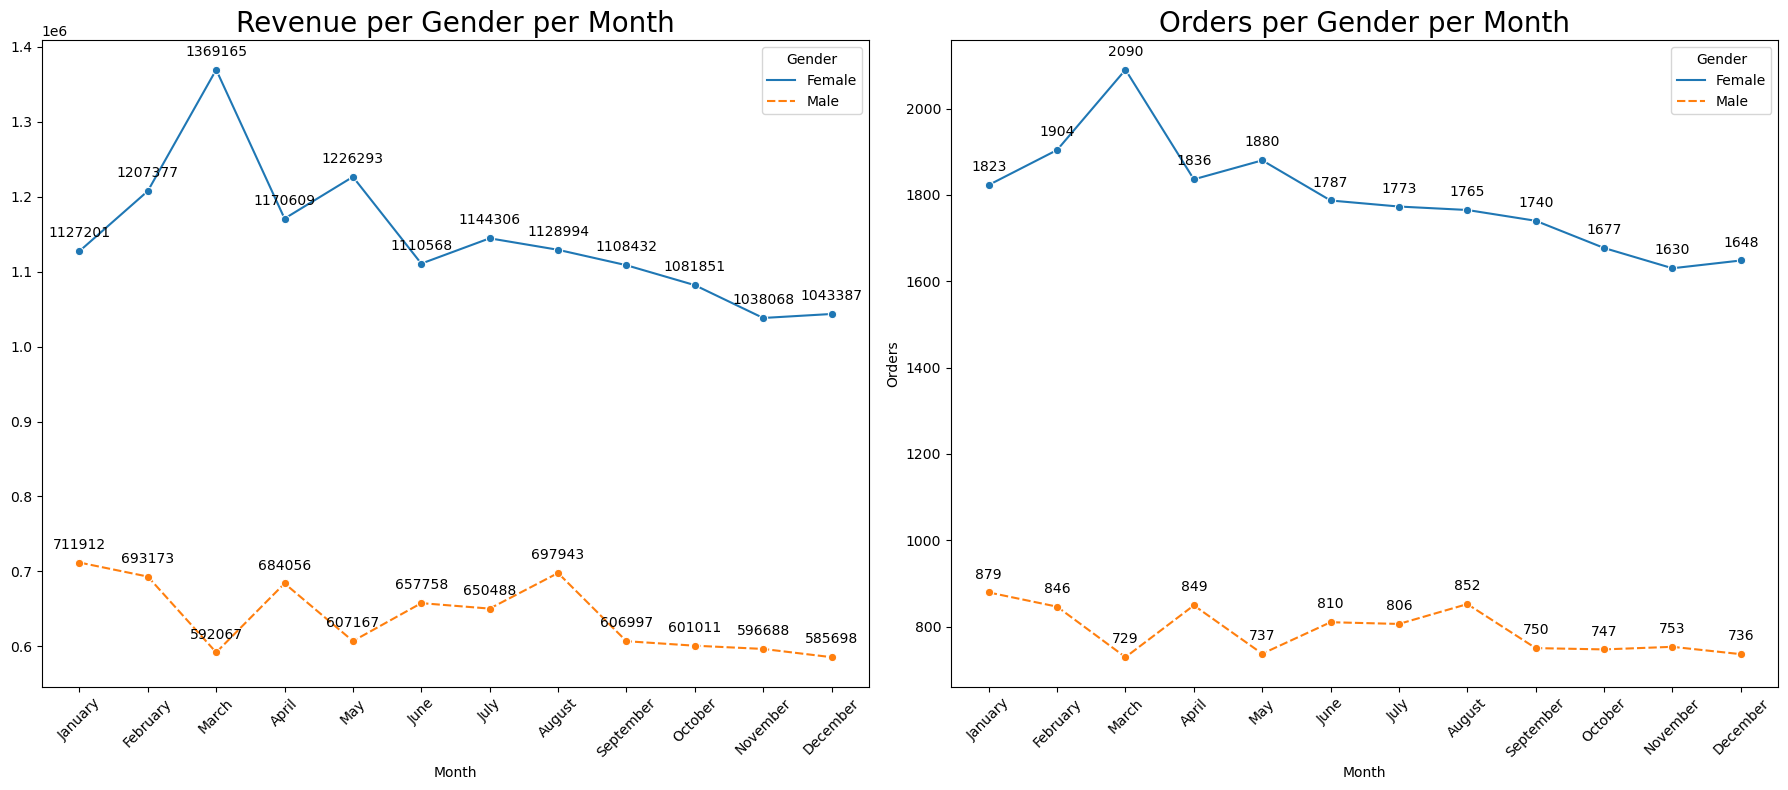

In [33]:
fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize=(18,8))

sns.lineplot(Revenue_gender_month,marker = "o",ax=ax1)

ax1.set_xticklabels(month_order, rotation=45)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_title("Revenue per Gender per Month",fontsize = 20)
ax1.set_xlabel("Month")

sns.lineplot(Orders_gender_month,marker = "o",ax=ax2)

ax2.set_xticklabels(month_order, rotation=45)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_title("Orders per Gender per Month",fontsize = 20)
ax2.set_xlabel("Month")
ax2.set_ylabel("Orders")

for ax in (ax1, ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')


plt.tight_layout()
plt.show()


##### March is the preferred shopping month for female customers, indicating a higher level of engagement, revenue order placement during that period. On the other hand, male customers tend to show a preference for January as their preferred shopping month, with increased activity, revenue and order placement during that time. 

### Revenue and Orders per Gender per Weekday

In [34]:
Revenue_gender_weekday = df.groupby(["Gender", "Weekday_num"])["Revenue"].sum().unstack("Gender")
Orders_gender_weekday = df.groupby(["Gender", "Weekday_num"])["Order ID"].count().unstack("Gender")

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4204422968.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(day_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\4204422968.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)


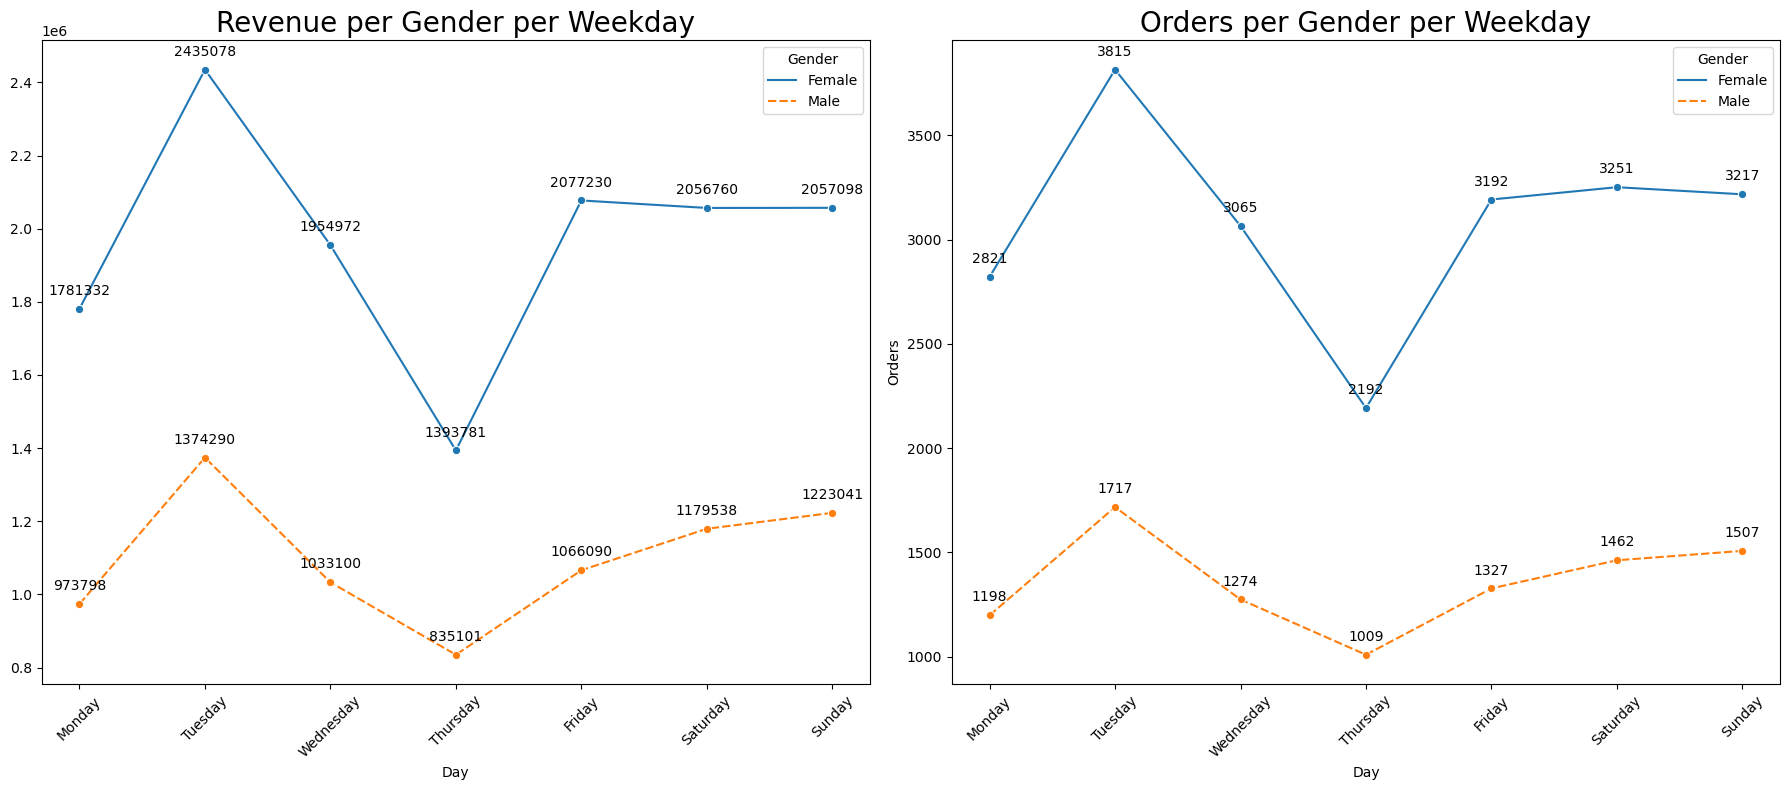

In [35]:
fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize=(18,8))

sns.lineplot(Revenue_gender_weekday, marker = "o",ax=ax1)
ax1.set_xticklabels(day_order, rotation=45)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_title("Revenue per Gender per Weekday",fontsize = 20)
ax1.set_xlabel("Day")

sns.lineplot(Orders_gender_weekday, marker = "o",ax=ax2)
ax2.set_xticklabels(day_order, rotation=45)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_title("Orders per Gender per Weekday",fontsize = 20)
ax2.set_xlabel("Day")
ax2.set_ylabel("Orders")

for ax in (ax1,ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

##### Tuesday is the preferred shopping day for both male and female customers. It appears to be the busiest day of the week in terms of customer activity and order placement and revenue generated for both genders.

### Deliveries by Gender by Month and Weekday

In [36]:
Delivered_gender_month = df.pivot_table(index="Month_num", columns="Gender", values="Order ID",aggfunc=lambda x: len(x[df["Status"]=="Delivered"]))
Delivered_gender_weekday = df.pivot_table(index="Weekday_num", columns="Gender", values="Order ID",aggfunc=lambda x: len(x[df["Status"]=="Delivered"]))

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\3728482514.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\3728482514.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)


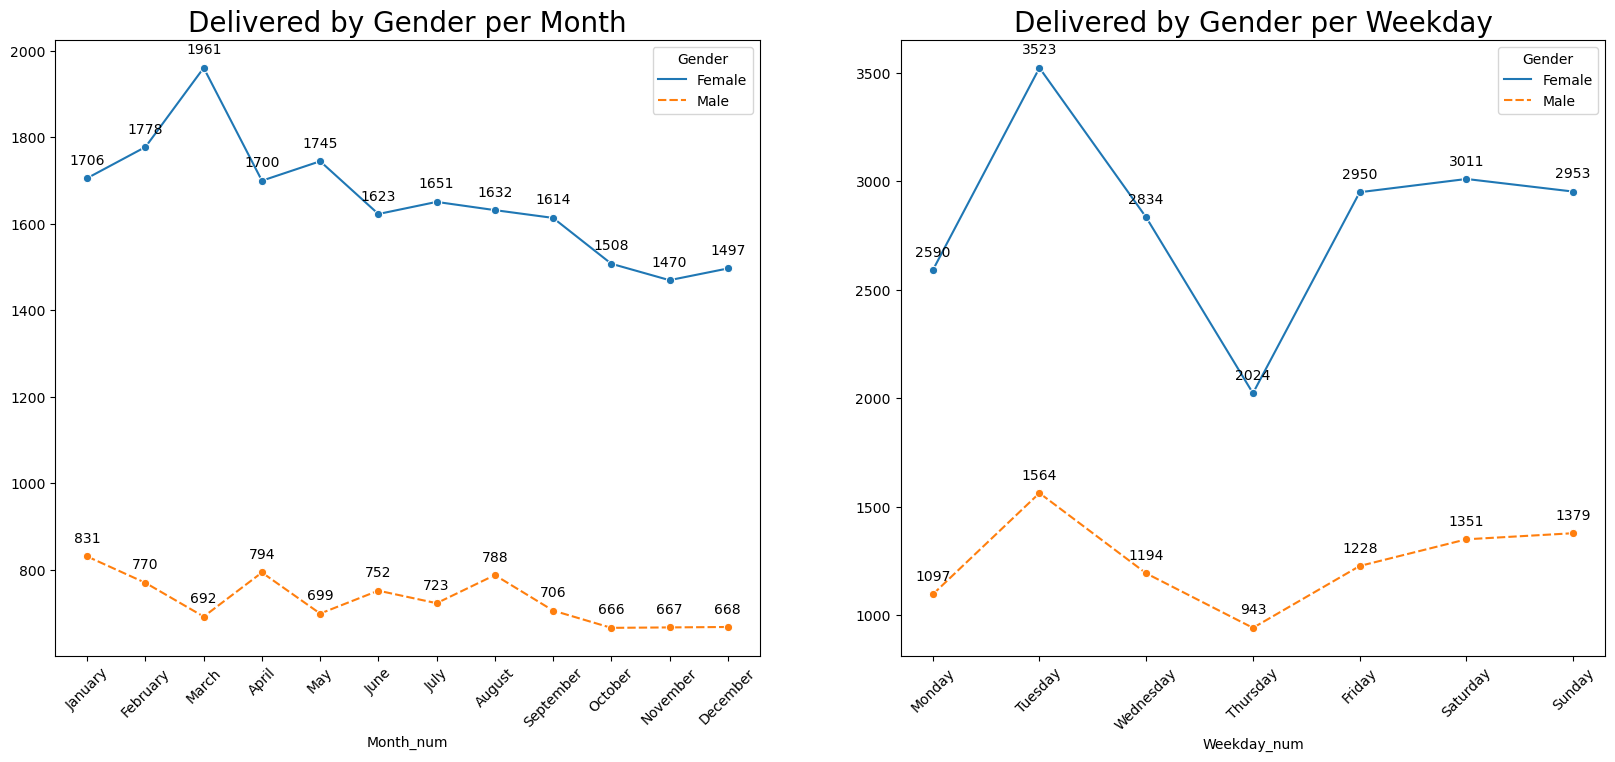

In [37]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sns.lineplot(Delivered_gender_month, marker="o",ax=ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xticklabels(month_order, rotation=45)
ax1.set_title("Delivered by Gender per Month",fontsize = 20)

sns.lineplot(Delivered_gender_weekday, marker="o",ax=ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_title("Delivered by Gender per Weekday",fontsize = 20)

for ax in (ax1, ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()


##### The month of March witnessed the highest number of orders delivered, with a majority of them being to female customers. Additionally, Tuesdays recorded the highest number of deliveries, primarily made to female customers.

### Refunds by Gender by Month and Weekday

In [38]:
Refunds_gender_month = df.pivot_table(index="Month_num", columns="Gender", values="Revenue",aggfunc=lambda x: sum(x[df["Status"]=="Refunded"]))
Refunds_gender_weekday = df.pivot_table(index="Weekday_num", columns="Gender", values="Revenue",aggfunc=lambda x: sum(x[df["Status"]=="Refunded"]))

C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2646104568.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(month_order, rotation=45)
C:\Users\ELITEBOOK\AppData\Local\Temp\ipykernel_7136\2646104568.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(day_order, rotation=45)


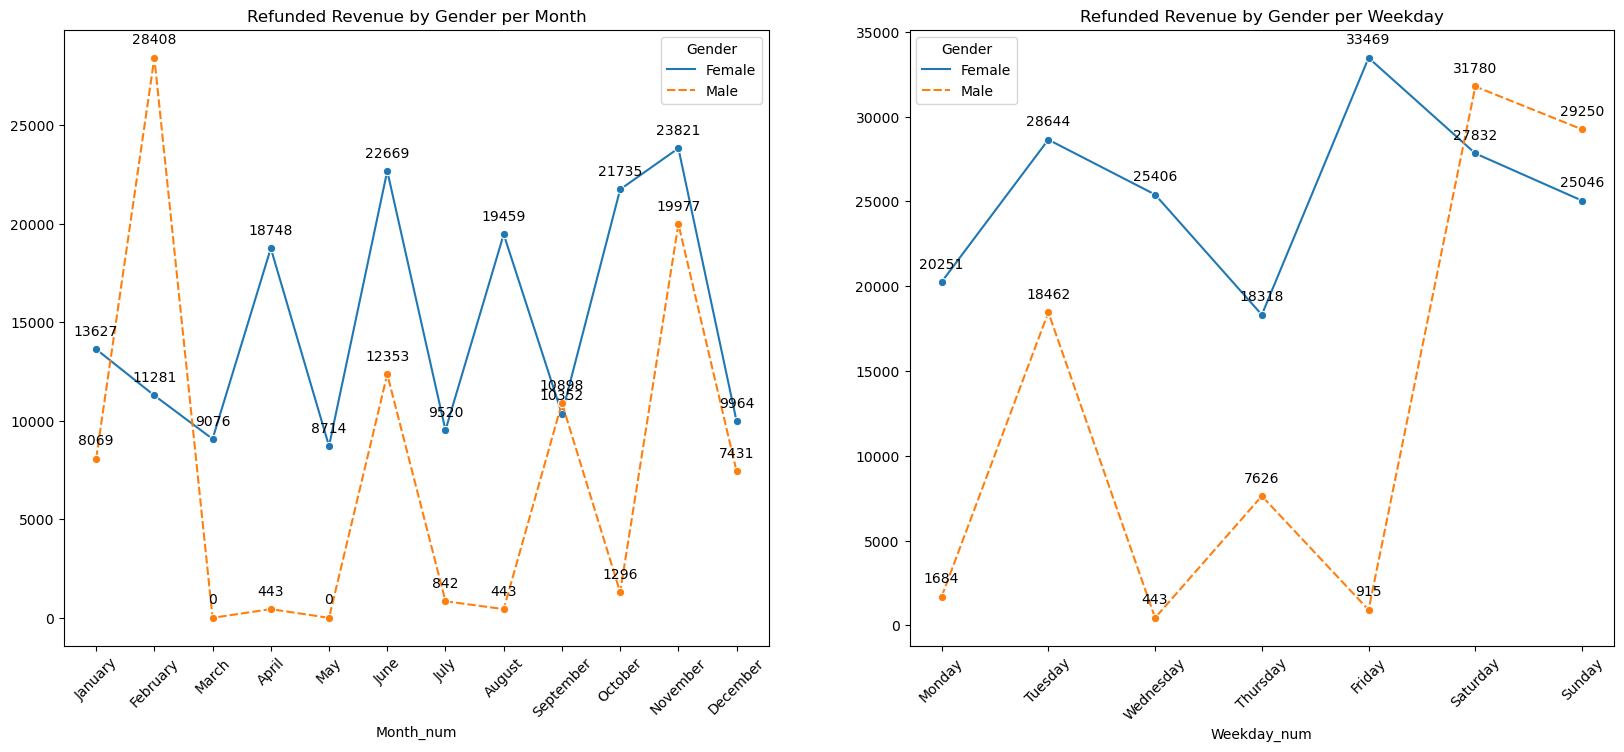

In [39]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,8))
sns.lineplot(Refunds_gender_month, marker="o",ax=ax1)
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.set_xticklabels(month_order, rotation=45)
ax1.set_title("Refunded Revenue by Gender per Month")

sns.lineplot(Refunds_gender_weekday, marker="o",ax=ax2)
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_title("Refunded Revenue by Gender per Weekday")

for ax in (ax1, ax2):
    for line in ax.lines:
        for x, y in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y)
            ax.annotate(label, (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.show()


##### The highest monthly refunds was recorded by male customers in February while the highest refund by weekday was recorded on Fridays by female customers

### Order Contribution and Order Status Rate by Gender

In [40]:
Orders_gender = df.groupby("Gender")["Order ID"].count()
Cancelled_rate_gender = round(df.loc[df["Status"]=="Cancelled"].groupby("Gender").size()/df.groupby("Gender").size()*100,2)
Returned_rate_gender = round(df.loc[df["Status"]=="Returned"].groupby("Gender").size()/df.groupby("Gender").size()*100,2)

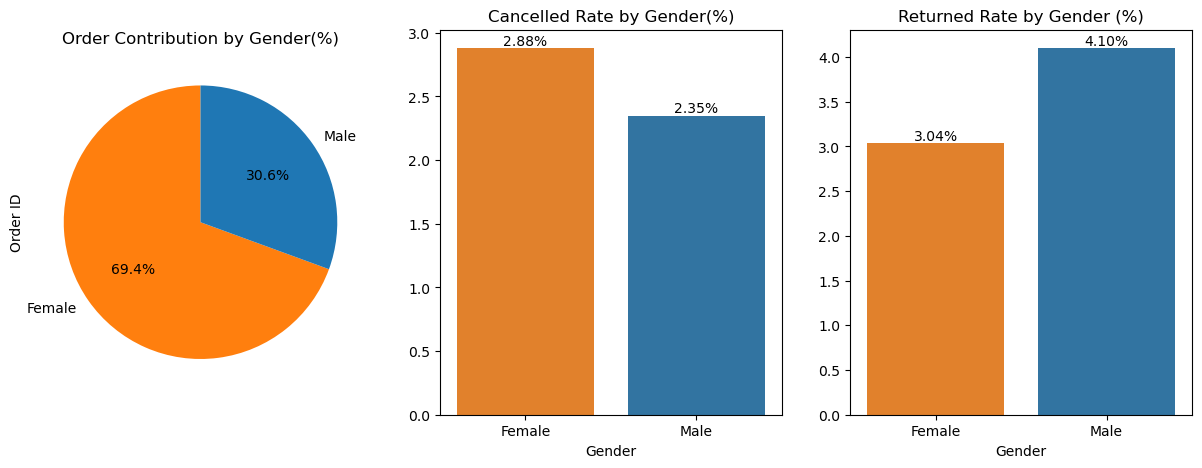

In [41]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(15,5))

Orders_gender.plot(kind="pie",x="Gender",y="Order ID",autopct="%1.1f%%",startangle=90,colors=["#ff7f0e","#1f77b4"],ax=ax1)
ax1.set_title("Order Contribution by Gender(%)")

sns.barplot(x=Cancelled_rate_gender.index,y=Cancelled_rate_gender.values,palette=["#ff7f0e","#1f77b4"],ax=ax2)
ax2.set_title("Cancelled Rate by Gender(%)")
sns.barplot(x=Returned_rate_gender.index,y=Returned_rate_gender.values,palette=["#ff7f0e","#1f77b4"],ax=ax3)
ax3.set_title("Returned Rate by Gender (%)")
for ax in (ax2,ax3):
    for p in ax.patches:
        ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.show()

##### 69.4% of the total orders received were contributed by female customers, who had a cancellation rate of 2.88% and a return rate of 3.04%. On the other hand, male customers accounted for 30.6% of the total orders, with a cancellation rate of 2.35% and a return rate of 4.20%.

### Orders by Gender per Category

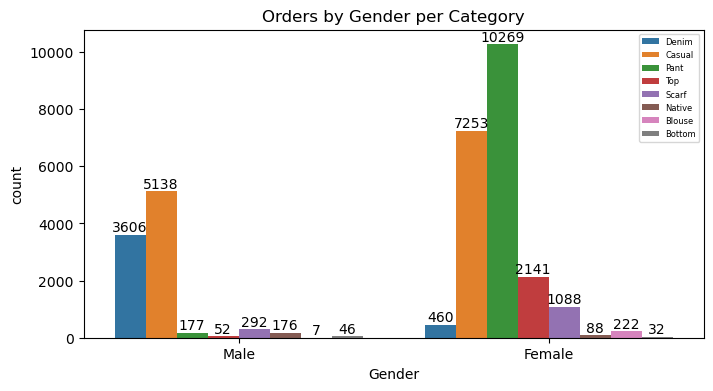

In [42]:
fig,ax=plt.subplots(figsize=(8,4))
sns.countplot(x="Gender",hue="Category",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Orders by Gender per Category")
plt.legend(fontsize=6)
plt.show()

##### Based on the data, female customers prefer the Pant category, while male customers prefer the Casual category.

### Orders by Gender per State

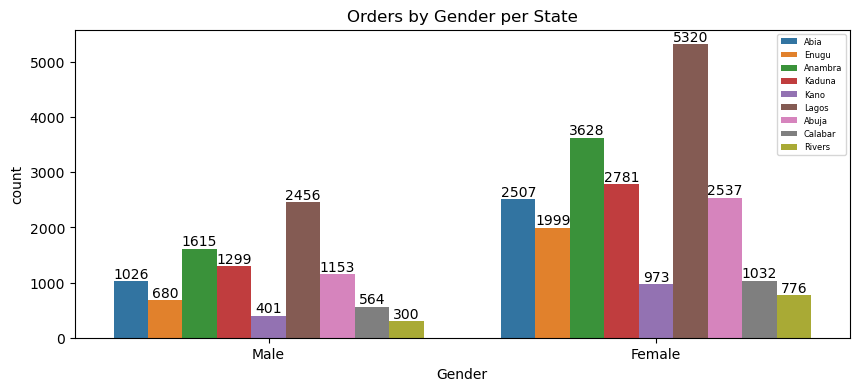

In [43]:
fig,ax=plt.subplots(figsize=(10,4))
sns.countplot(x="Gender",hue="ship-state",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Orders by Gender per State")
plt.legend(fontsize=6)
plt.show()

##### The highest number of orders, 5,320 in total, came from female customers in Lagos. Interestingly, Lagos state also recorded the highest number of orders received from male customers.

### Orders by Gender per Age Group

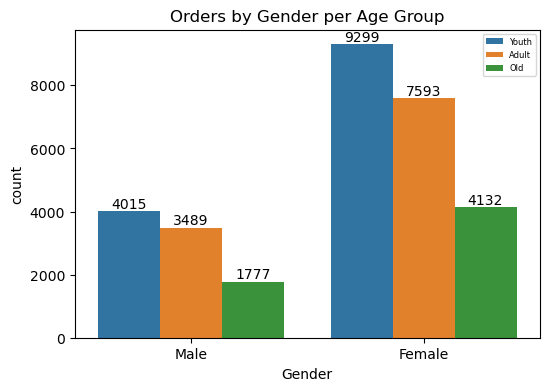

In [44]:
fig,ax=plt.subplots(figsize=(6,4))
sns.countplot(x="Gender",hue="Age_Group", data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Orders by Gender per Age Group")
plt.legend(fontsize=6)
plt.show()

##### The highest number of orders received were from female customers in the age group of 18-34 years, indicating that female youths are the most active in making purchases. Similarly, the highest number of orders received from male customers also belongs to the age group of 18-34 years, suggesting that male youths are the predominant customers in terms of order volume.

### Orders by Gender per Channel

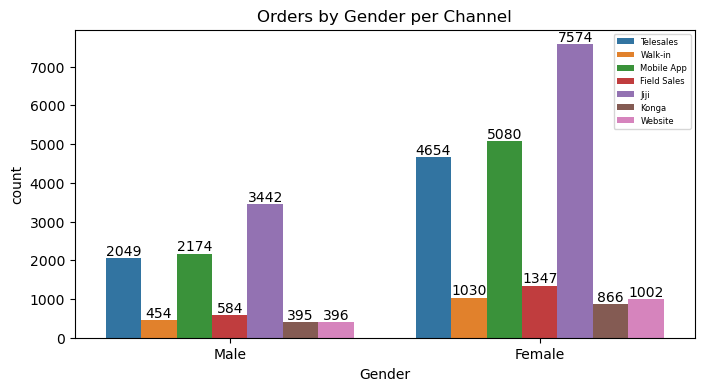

In [45]:
fig,ax=plt.subplots(figsize=(8,4))
sns.countplot(x="Gender",hue="Channel",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Orders by Gender per Channel")
plt.legend(loc="upper right",fontsize=6)
plt.show()

##### Both female and male customers showed a preference for the Jiji channel, with a total of 7,574 orders coming from female customers and 3,442 orders from male customers.

## State Analysis

### Revenue vs Orders per State 

In [46]:
Revenue_state = df.groupby("ship-state")["Revenue"].sum()
Orders_state = df.groupby("ship-state")["Order ID"].count()

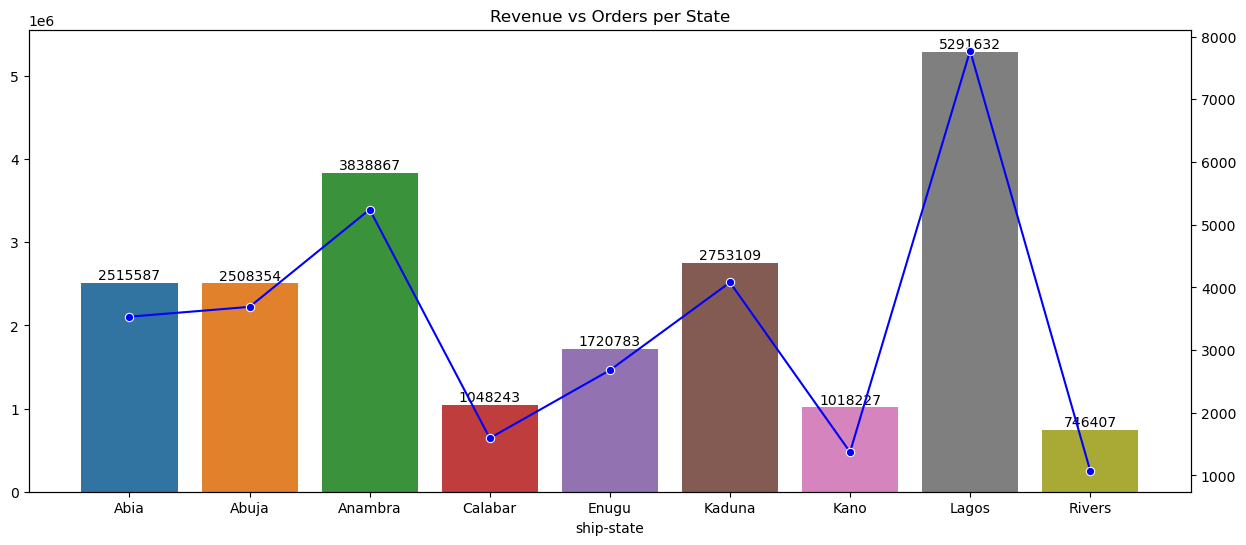

In [47]:
fig,ax1=plt.subplots(figsize=(15,6))
sns.barplot(x=Revenue_state.index,y=Revenue_state.values,ax=ax1)
ax1.set_title("Revenue vs Orders per State")
ax2=ax1.twinx()
sns.lineplot(x=Orders_state.index,y=Orders_state.values,ax=ax2, marker = "o",color = "b")
for p in ax1.patches:
    ax1.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
    ha="center", va="center", xytext=(0, 5), textcoords="offset points")


plt.show()

##### Lagos State emerged as the top-performing state, generating the highest revenue and highest number of orders.

### Delivery rate, Return rate, Cancelled rate  and Refunds per State

In [48]:
Delivery_rate_state = round(df.loc[df["Status"]=="Delivered"].groupby("ship-state").size()/df.groupby("ship-state").size()*100,2)
Return_rate_state = round(df.loc[df["Status"]=="Returned"].groupby("ship-state").size()/df.groupby("ship-state").size()*100,2)
Cancel_rate_state = round(df.loc[df["Status"]=="Cancelled"].groupby("ship-state").size()/df.groupby("ship-state").size()*100,2)
Refund_state = df.loc[df["Status"] == "Refunded","Revenue"].groupby(df["ship-state"]).sum()

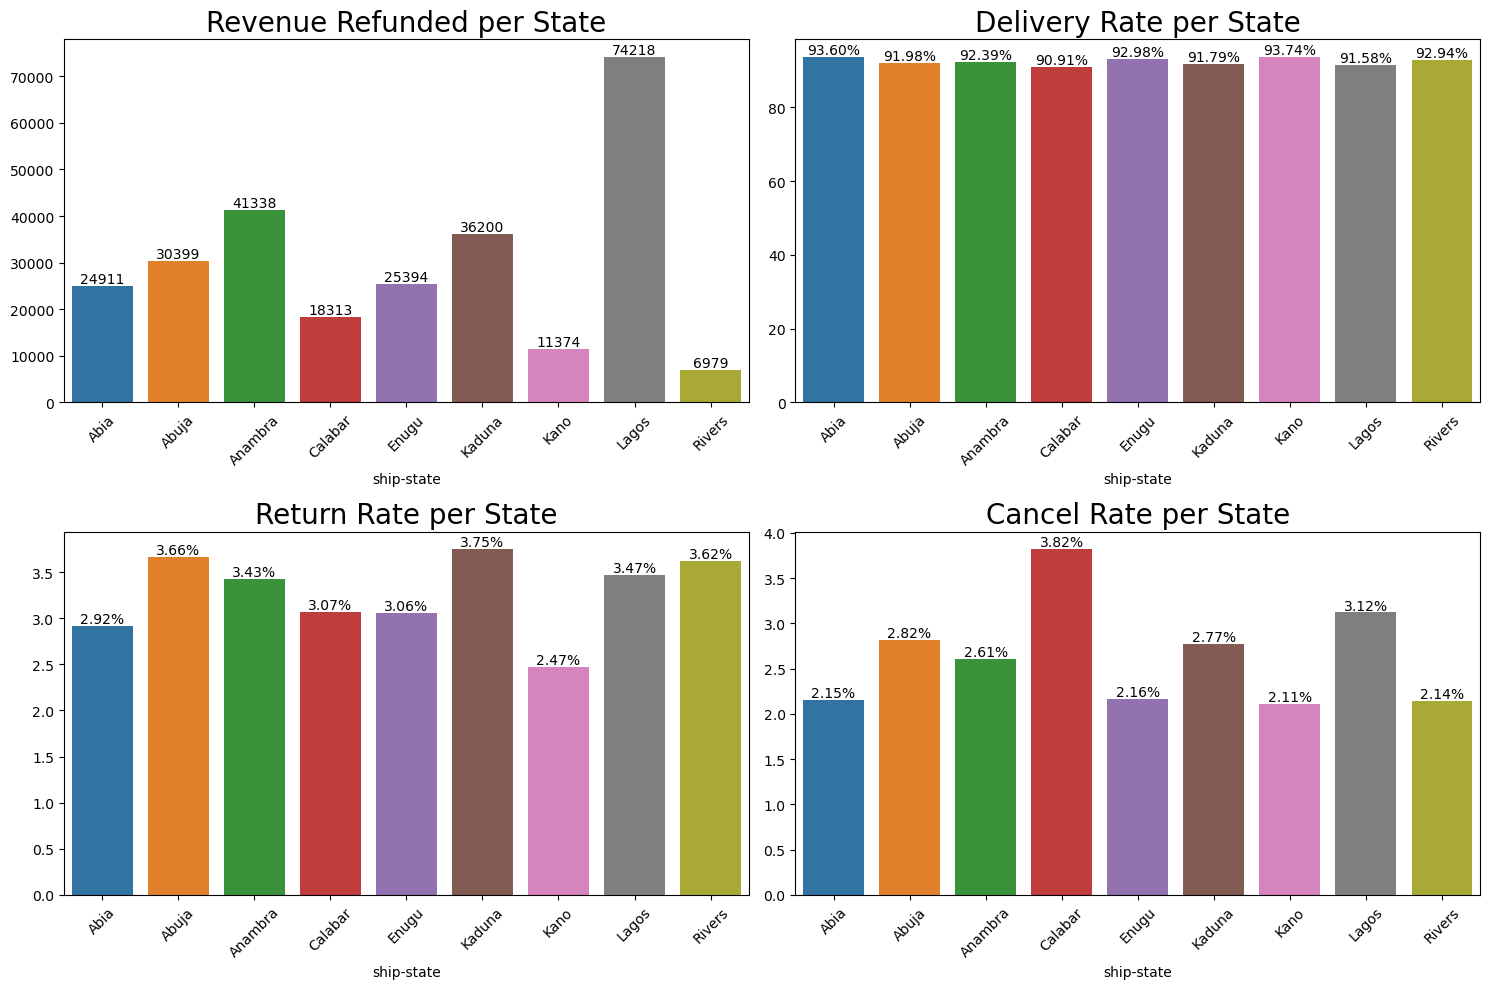

In [49]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows=2,figsize=(15,10))
sns.barplot(x=Refund_state.index,y=Refund_state.values,ax=ax1)
ax1.set_title("Revenue Refunded per State",fontsize=20)
ax1.set_xticklabels(Refund_state.index, rotation=45)

for p in ax1.patches:
    ax1.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="center", xytext=(0, 5), textcoords="offset points")

sns.barplot(x=Delivery_rate_state .index,y=Delivery_rate_state.values,ax=ax2)
ax2.set_title("Delivery Rate per State",fontsize=20)
ax2.set_xticklabels(Return_rate_state.index, rotation=45)

sns.barplot(x=Return_rate_state .index,y=Return_rate_state.values,ax=ax3)
ax3.set_title("Return Rate per State",fontsize=20)
ax3.set_xticklabels(Return_rate_state.index, rotation=45)

sns.barplot(x=Cancel_rate_state .index,y=Cancel_rate_state.values,ax=ax4)
ax4.set_title("Cancel Rate per State",fontsize=20)
ax4.set_xticklabels(Cancel_rate_state.index, rotation=45)

for ax in (ax2,ax3,ax4):
    for p in ax.patches:
        ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha="center", va="center", xytext=(0, 5), textcoords="offset points")
plt.tight_layout()
plt.show()

##### Among the states, Lagos has the highest refund amount. Kaduna has the highest number of returned items, Calabar has the highest cancellation rate, while Kano has the highest delivery rate

### Orders per Channel by State

In [50]:
df.pivot_table(index="ship-state",columns="Channel",values="Order ID",aggfunc="count")

Channel,Field Sales,Jiji,Konga,Mobile App,Telesales,Walk-in,Website
ship-state,,,,,,,
Abia,212,1224,136,825,805,176,155
Abuja,241,1345,151,830,823,162,138
Anambra,322,1817,231,1253,1151,235,234
Calabar,87,568,60,397,349,75,60
Enugu,157,955,96,632,557,146,136
Kaduna,230,1469,166,943,876,200,196
Kano,93,477,56,315,313,58,62
Lagos,516,2785,321,1810,1602,373,369
Rivers,73,376,44,249,227,59,48


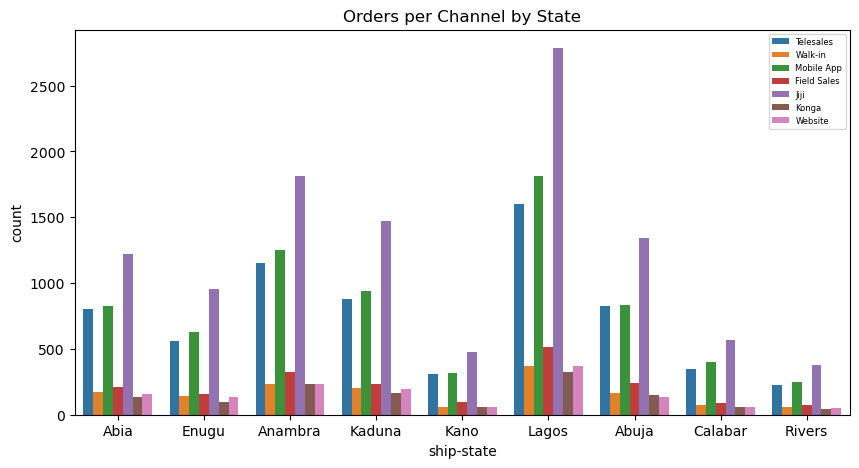

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x="ship-state",hue="Channel",data=df)
plt.legend(fontsize=6)
plt.title("Orders per Channel by State")
plt.show()

##### Jiji is the most preferred channel across all states, with Lagos state having the highest number of orders placed through Jiji compared to other channels.

## Age_Group Analysis

### Age_Group Distribution 

In [52]:
Age_group_counts = df["Age_Group"].value_counts()

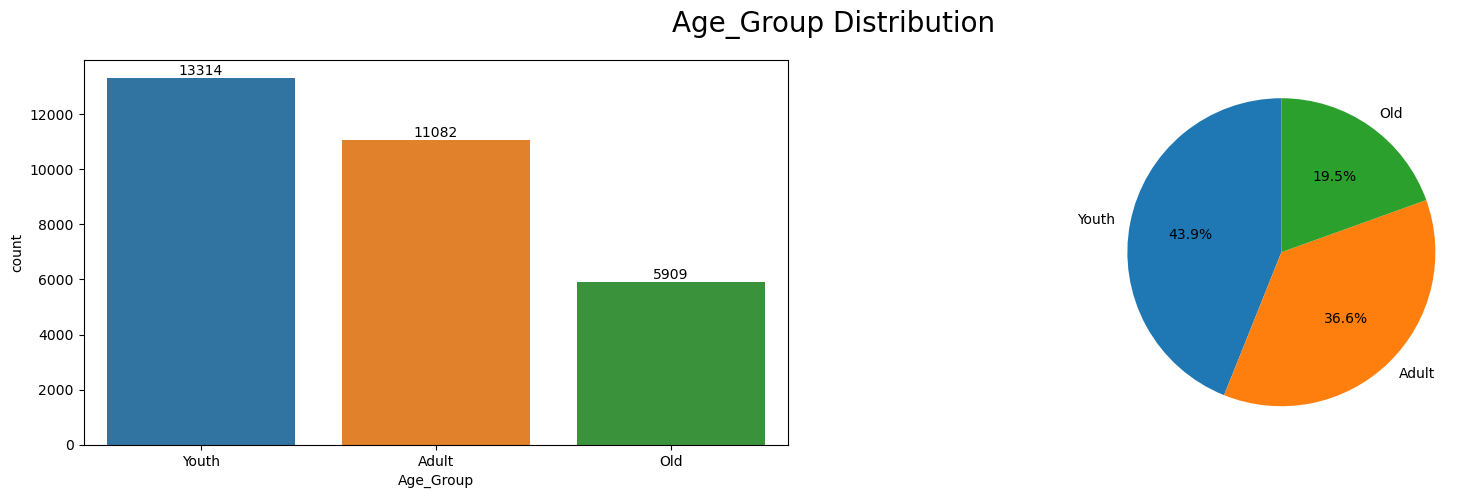

In [53]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x= "Age_Group",data=df,ax=ax1)
for bars in ax1.containers:
    ax1.bar_label(bars)
ax2.pie(Age_group_counts, labels=Age_group_counts.index, autopct="%1.1f%%",startangle=90)
plt.suptitle("Age_Group Distribution",fontsize = 20)
plt.show()


##### The age group of youths (18 - 34 years) constitutes the largest segment of customers, representing 43.9% of the total customer base. This age group also generates the highest number of orders among all age groups.

### Age_Group Revenue, Orders and Refunds 

In [54]:
Revenue_age_group = df.groupby("Age_Group")["Revenue"].sum()
Orders_age_group = df.groupby("Age_Group")["Order ID"].count()
Refunds_age_group = df.loc[df["Status"]=="Refunded","Revenue"].groupby(df["Age_Group"]).sum()

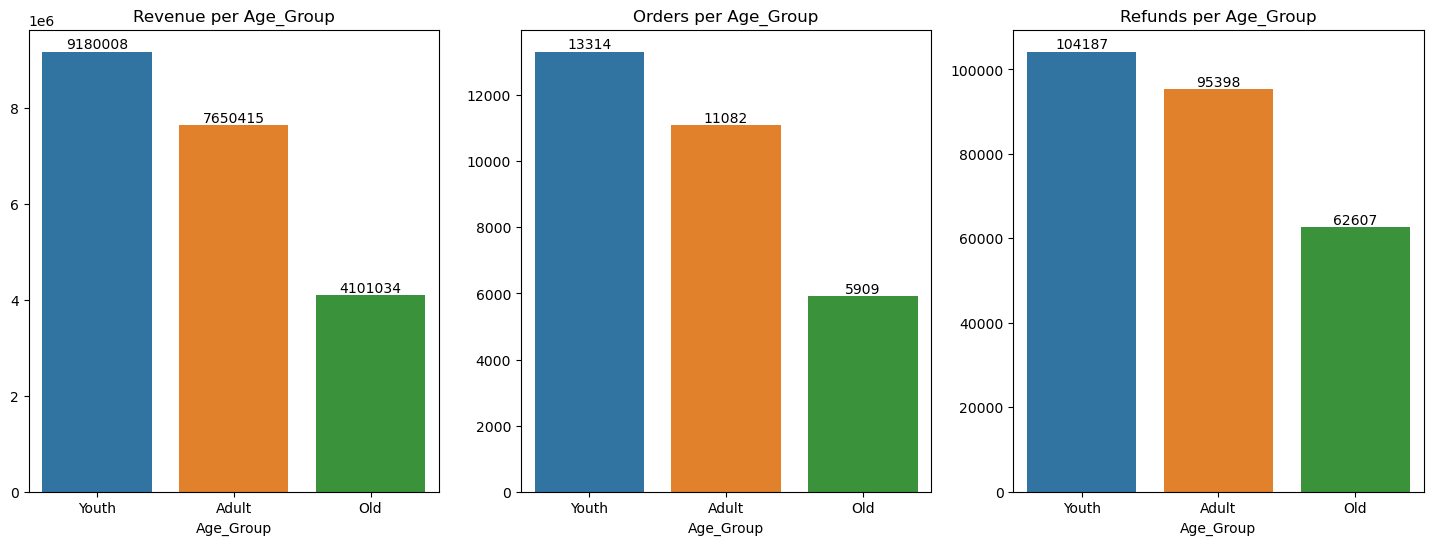

In [55]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(18,6))
sns.barplot(x=Revenue_age_group.index,y=Revenue_age_group.values,ax=ax1)
ax1.set_title("Revenue per Age_Group")
sns.barplot(x=Orders_age_group.index,y=Orders_age_group.values,ax=ax2)
ax2.set_title("Orders per Age_Group")
sns.barplot(x=Refunds_age_group.index,y= Refunds_age_group.values,ax=ax3)
ax3.set_title("Refunds per Age_Group")

for ax in (ax1, ax2,ax3):
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")

plt.show()

##### The age group of youths (18-34) plays a significant role in driving both revenue and orders. They contribute the highest amount of revenue and generate the highest number of orders compared to other age groups. Additionally, they also account for the highest amount of refunded revenue, indicating their active participation in the purchasing process.

### Delivery, Return and Cancel Rate by Age_Group

In [56]:
Delivery_rate_age = round(df.loc[df["Status"]=="Delivered"].groupby("Age_Group").size()/df.groupby("Age_Group").size()*100,2)
Return_rate_age = round(df.loc[df["Status"]=="Returned"].groupby("Age_Group").size()/df.groupby("Age_Group").size()*100,2)
Cancel_rate_age = round(df.loc[df["Status"]=="Cancelled"].groupby("Age_Group").size()/df.groupby("Age_Group").size()*100,2)

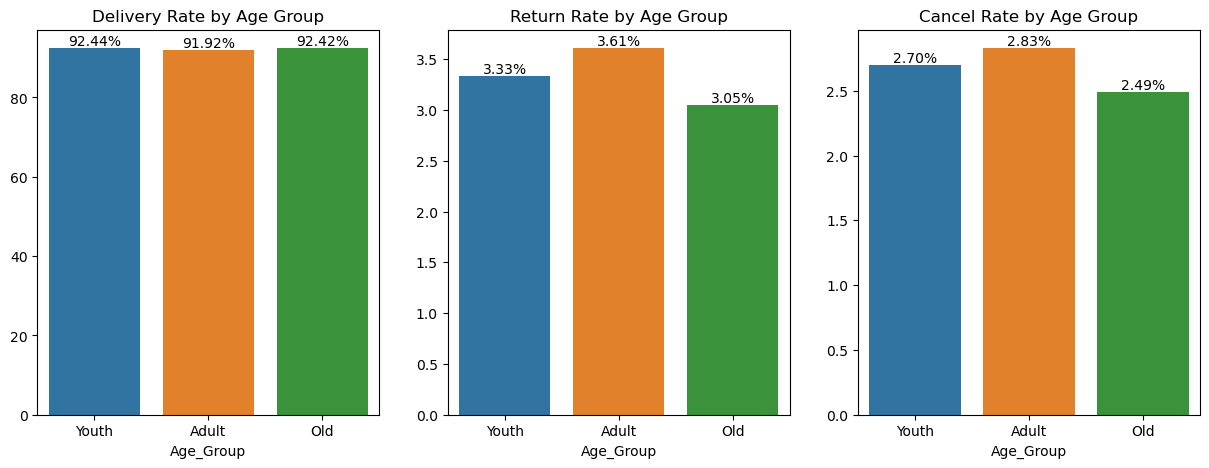

In [57]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(15,5))
sns.barplot(x=Delivery_rate_age.index,y=Delivery_rate_age.values,ax=ax1)
ax1.set_title("Delivery Rate by Age Group")
sns.barplot(x=Return_rate_age.index,y=Return_rate_age.values,ax=ax2)
ax2.set_title("Return Rate by Age Group")
sns.barplot(x=Cancel_rate_age.index,y=Cancel_rate_age.values,ax=ax3)
ax3.set_title("Cancel Rate by Age Group")
for ax in (ax1,ax2,ax3):
    for p in ax.patches:
        ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha="center", va="center", xytext=(0, 5), textcoords="offset points")
plt.show()

##### The age group of adults (35-49 years) has the highest return and cancel rate among all customer segments, while youths (18-34) has the highest delivery rate

### Age_Group distribution by State

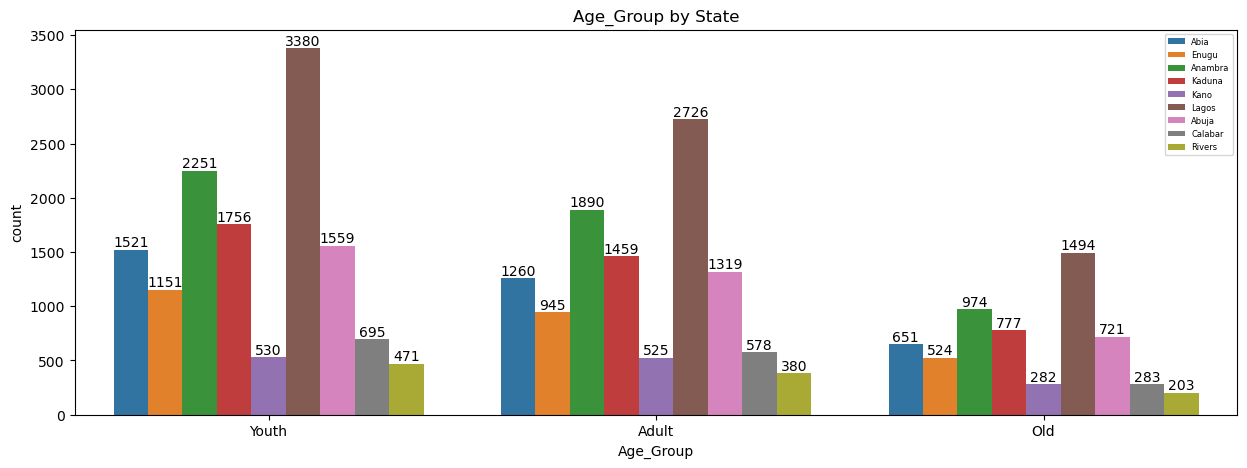

In [58]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x="Age_Group",hue="ship-state",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize=6)
plt.title("Age_Group by State")
plt.show()

##### Lagos has the highest number of customers across all age groups, including youths, adults, and older customers.

### Channel Preference by Age_Group

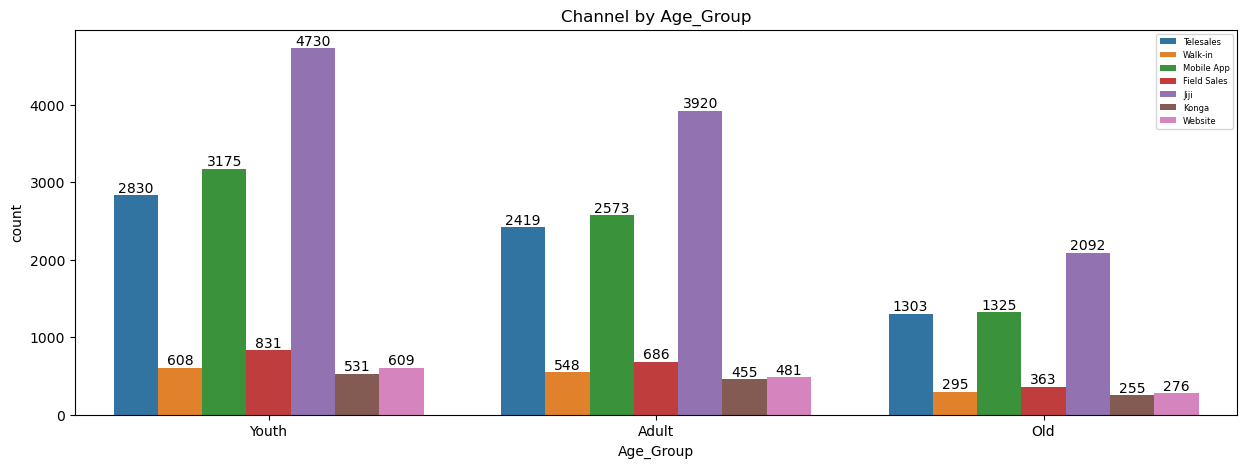

In [59]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(x="Age_Group",hue="Channel",data=df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.legend(fontsize=6)
plt.title("Channel by Age_Group")
plt.show()

##### Jiji is the most preferred channel among customers of all age groups.

### Revenue vs Orders per Channel

In [60]:
Orders_channel = df.groupby("Channel")["Order ID"].count()
Revenue_channel = df.groupby("Channel")["Revenue"].sum()

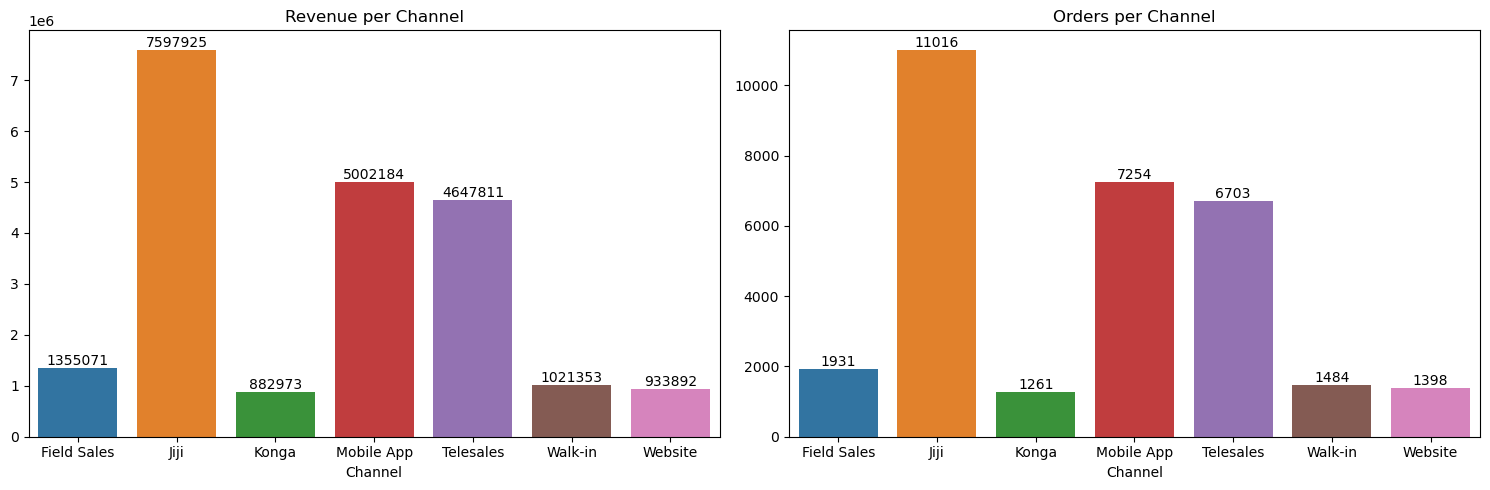

In [61]:
fig,(ax1,ax2)=plt.subplots(ncols = 2,figsize=(15,5))
sns.barplot(x=Revenue_channel.index,y=Revenue_channel.values,ax=ax1)
ax1.set_title("Revenue per Channel")
sns.barplot(x=Orders_channel.index,y=Orders_channel.values,ax=ax2)
ax2.set_title("Orders per Channel")
for ax in (ax1,ax2):
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha="center", va="center", xytext=(0, 5), textcoords="offset points")
plt.tight_layout()    
plt.show()

##### The Jiji channel received the highest number of orders and generated the highest revenue.

### Orders Status per Channel

In [62]:
Channel_delivered = df.loc[df["Status"]=="Delivered","Order ID"].groupby(df["Channel"]).count().sort_values(ascending=False)
Channel_refund = df.loc[df["Status"]=="Refunded","Revenue"].groupby(df["Channel"]).sum().sort_values(ascending=False)
Channel_return = df.loc[df["Status"]=="Returned","Order ID"].groupby(df["Channel"]).count().sort_values(ascending=False)
Channel_cancelled = df.loc[df["Status"]=="Cancelled","Order ID"].groupby(df["Channel"]).count().sort_values(ascending=False)

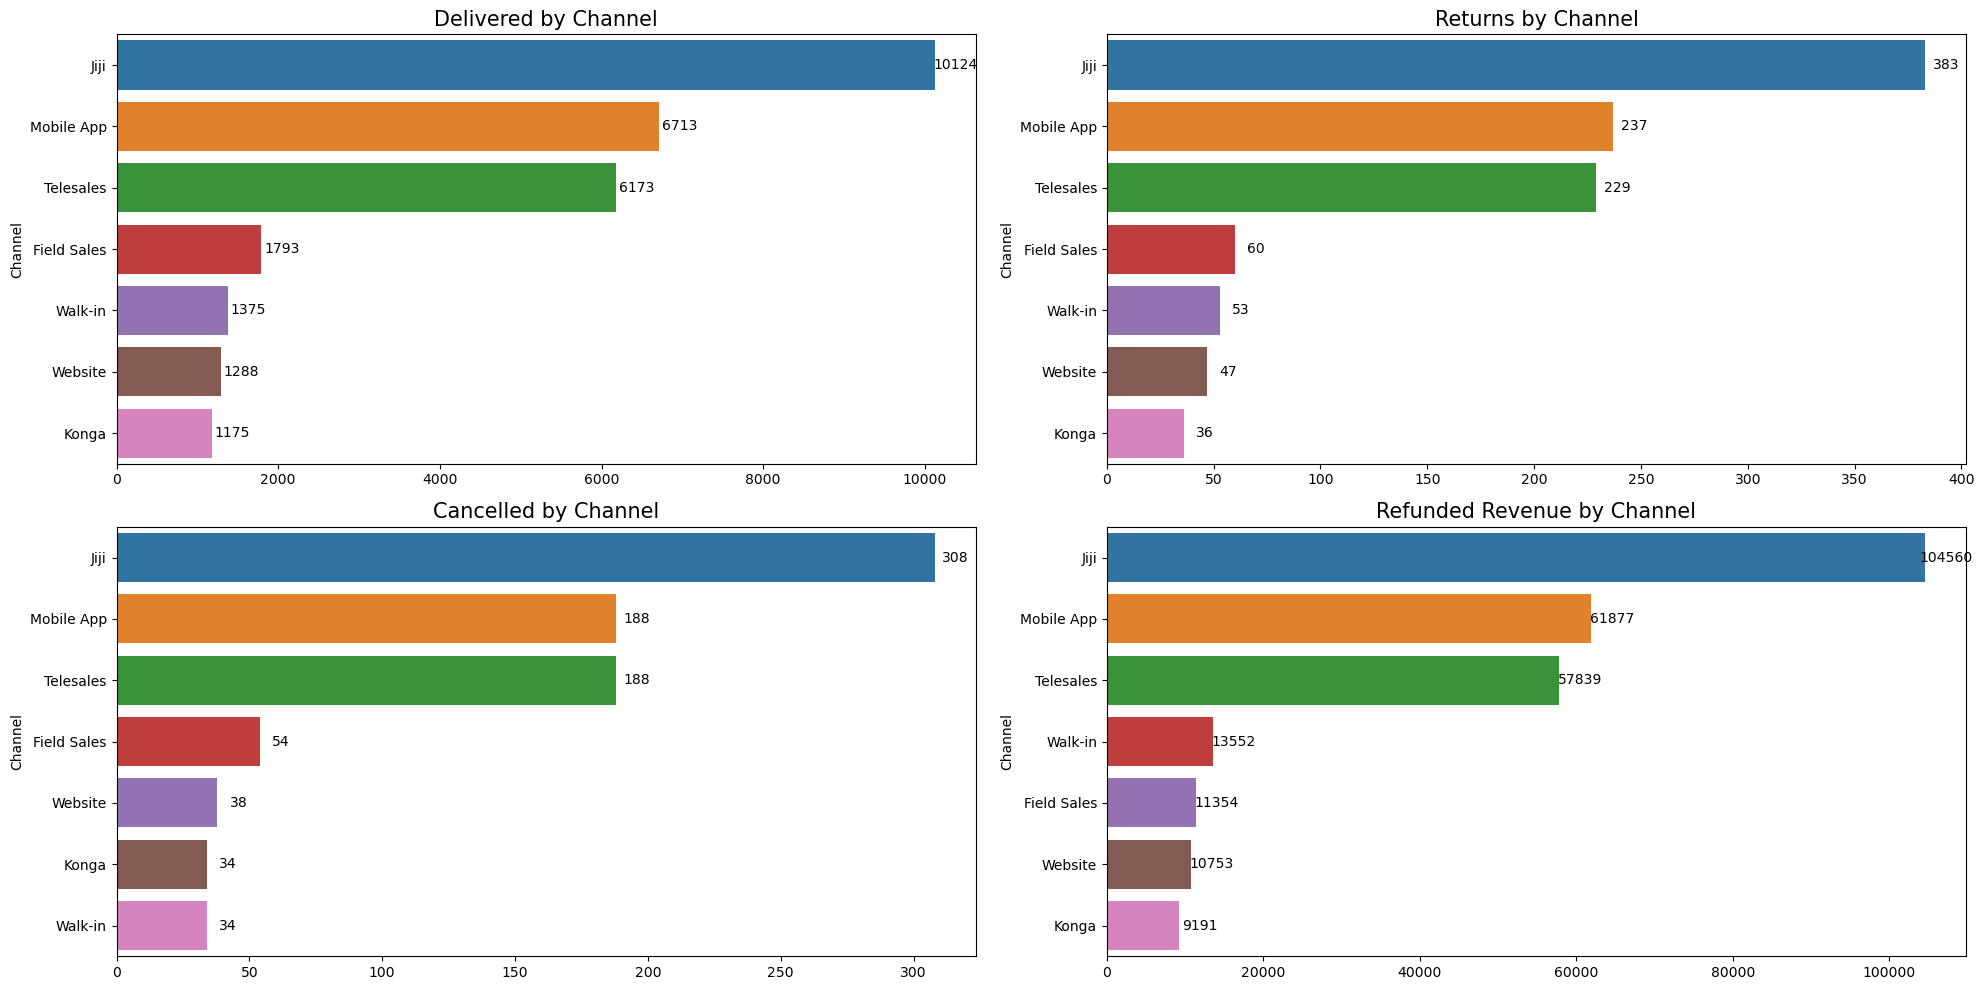

In [63]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(ncols=2,nrows = 2, figsize=(20,10))
sns.barplot(x=Channel_delivered.values,y=Channel_delivered.index,orient="h",ax=ax1)
ax1.set_title("Delivered by Channel",fontsize = 15)
sns.barplot(x=Channel_return.values,y=Channel_return.index,orient="h",ax=ax2)
ax2.set_title("Returns by Channel",fontsize = 15)
sns.barplot(x=Channel_cancelled.values,y=Channel_cancelled.index,orient="h",ax=ax3)
ax3.set_title("Cancelled by Channel",fontsize = 15)
sns.barplot(x=Channel_refund.values,y=Channel_refund.index,orient="h",ax=ax4)
ax4.set_title("Refunded Revenue by Channel",fontsize = 15)

for ax in (ax1, ax2, ax3, ax4):
    for p in ax.patches:
        ax.annotate("{:.0f}".format(p.get_width()), (p.get_width(), p.get_y() + p.get_height() / 2),
        ha="center", va="center", xytext=(15, 0), textcoords="offset points")
plt.tight_layout()
plt.show()

##### Jiji sales channel has the highest number of delivered, returned, and cancelled orders. Additionally, Jiji also recorded the highest amount of  revenue refunded.

### B2B Contributions

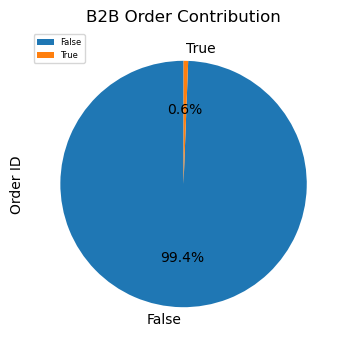

In [64]:
fig,ax1=plt.subplots(figsize=(6,4))
df.groupby(["B2B"]).count().plot(kind="pie",x="B2B",y="Order ID",autopct="%1.1f%%",startangle=90,ax=ax1)
plt.title("B2B Order Contribution")
plt.legend(loc="upper left",fontsize=6)
plt.show()

##### 99.4% of the orders received are from final consumers while 0.6% of the orders received are from Businesses. 